# Implementing Third Model

Importing packages

In [1]:
# Importing Core Packages
import pandas as pd #data analysis
import numpy as np #numerical python linear algebra
import csv 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for function calling
import os

# For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Reading the datasets

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325
5,0,45333,14561,117951,117952,118008,118568,118568,19721,118570
6,1,25993,17227,117961,118343,123476,118980,301534,118295,118982
7,1,19666,4209,117961,117969,118910,126820,269034,118638,126822
8,1,31246,783,117961,118413,120584,128230,302830,4673,128231
9,1,78766,56683,118079,118080,117878,117879,304519,19721,117880


In [4]:
test =  pd.read_csv('test.csv')

In [5]:
test.head(10)

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
5,6,44722,1755,117961,117962,119223,125793,146749,118643,125795
6,7,75834,21135,117961,118343,123494,118054,118054,117887,118055
7,8,4675,3077,117961,118300,120312,124194,124195,118363,124196
8,9,18072,15575,117902,118041,118623,280788,280788,292795,119082
9,10,22680,4474,117961,118446,119064,118321,118448,290919,118322


Univariate Analysis

Checking frequency

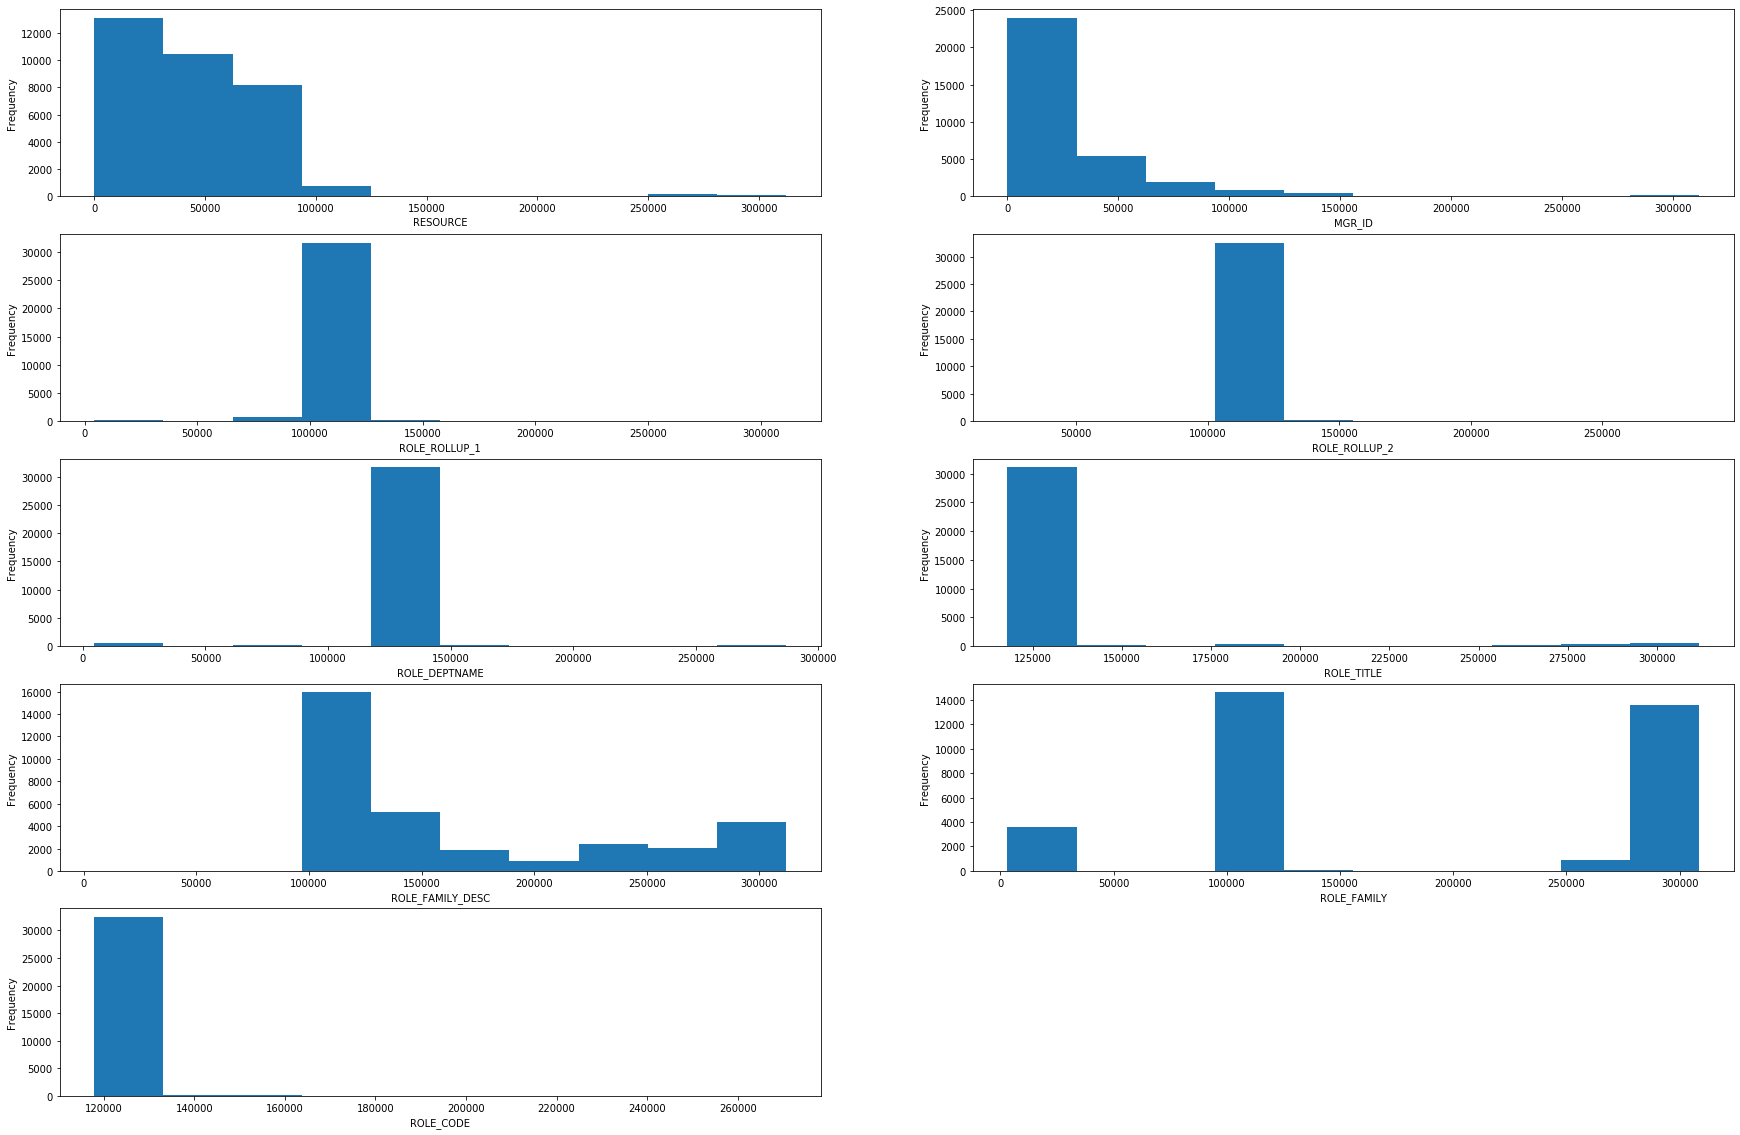

In [6]:
#Plotting Frequecy Graph
plt.figure(figsize=(30,20))
for i in range(1,10):
    plt.subplot(5,2,i)
    plt.hist(train[train.columns[i]])
    plt.xlabel(train.columns[i])
    plt.ylabel("Frequency")
plt.show()

In [7]:
train.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [8]:
test.apply(lambda x: len(x.unique()))

id                  58921
RESOURCE             4971
MGR_ID               4689
ROLE_ROLLUP_1         126
ROLE_ROLLUP_2         177
ROLE_DEPTNAME         466
ROLE_TITLE            351
ROLE_FAMILY_DESC     2749
ROLE_FAMILY            68
ROLE_CODE             351
dtype: int64

In [9]:
import itertools
target = "ACTION"
train_col = [x for x in train.columns if x!=target]

col1 = 'ROLE_CODE'
col2 = 'ROLE_TITLE'

pair = len(train.groupby([col1,col2]).size())
single = len(train.groupby([col1]).size())

print(col1, col2, pair, single)

ROLE_CODE ROLE_TITLE 343 343


In [10]:
import itertools
target = "ID"
test_col = [x for x in test.columns if x!=target]

col1 = 'ROLE_CODE'
col2 = 'ROLE_TITLE'

pair = len(test.groupby([col1,col2]).size())
single = len(test.groupby([col1]).size())

print(col1, col2, pair, single)

ROLE_CODE ROLE_TITLE 351 351


In [11]:
train_col = [x for x in train_col if x!='ROLE_TITLE']
train_col

['RESOURCE',
 'MGR_ID',
 'ROLE_ROLLUP_1',
 'ROLE_ROLLUP_2',
 'ROLE_DEPTNAME',
 'ROLE_FAMILY_DESC',
 'ROLE_FAMILY',
 'ROLE_CODE']

In [12]:
test_col = [x for x in test_col if x!='ROLE_TITLE']
test_col

['id',
 'RESOURCE',
 'MGR_ID',
 'ROLE_ROLLUP_1',
 'ROLE_ROLLUP_2',
 'ROLE_DEPTNAME',
 'ROLE_FAMILY_DESC',
 'ROLE_FAMILY',
 'ROLE_CODE']

In [13]:
id = test.iloc[:,0].values
test.drop('id',axis = True)

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...
58916,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [14]:
X = train.iloc[:, 1:11].values
y = train.iloc[:,0].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.57998593, -0.49118055,  0.09671547, ...,  1.93628094,
        -0.64555862,  0.13274223],
       [-1.21869054,  1.87274458,  0.93602055, ..., -0.52430757,
        -0.59538322,  2.39208012],
       [-0.02607734, -0.01461683,  0.1559464 , ..., -0.63954884,
        -1.62919914, -0.21118266],
       ...,
       [-0.79247966, -0.29205719,  0.12397464, ...,  1.67181662,
         1.08613874, -0.1374598 ],
       [-0.04266639,  1.27307929, -2.37047001, ..., -0.75113121,
         1.06748455, -0.25400062],
       [-0.04266639, -0.25883264,  0.09671547, ...,  2.02477184,
        -0.64866102, -0.21895205]])

In [17]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 99, criterion = 'entropy', random_state = 0)
random.fit(X_train, y_train)
random

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
y_pred = random.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 131,  241],
       [  92, 6090]], dtype=int64)

In [20]:
#calculating accuracy manually
(131+6090)/(131+6090+92+241)

0.9491913335367714

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9491913335367714

In [22]:
test

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...,...
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [23]:
test1= test.drop(['id'], axis=1)

In [24]:
test1

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...
58916,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [25]:
test_fitter = random.predict(test1)

In [26]:
result3 = pd.DataFrame({'Id' : id, 'Action' : test_fitter})
result3

,Id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
58916,58917,1
58917,58918,1
58918,58919,1
58919,58920,1


AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

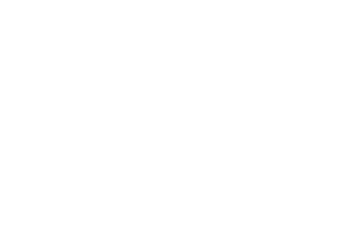

In [29]:
from sklearn import tree
tree.plot_tree()